In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from typing import Type
from scipy.stats import boxcox, boxcox_normmax, boxcox_normplot

In [228]:
carsales = pd.read_csv('carsales.csv')
carsales.head()

,Year,Model,AskPrice,Odometer,Transmission,Power
0,2021,Corolla,35990,28929.0,Automatic,Hybrid
1,2022,Corolla,37888,14020.0,Automatic,Hybrid
2,2013,Camry,23950,128870.0,Automatic,Hybrid
3,2022,Corolla,42499,2400.0,Automatic,Hybrid
4,2015,Camry,22975,99143.0,Automatic,Petrol


In [229]:
carsales.Power.astype("category")

0      Hybrid
1      Hybrid
2      Hybrid
3      Hybrid
4      Petrol
        ...  
813    Petrol
814    Petrol
815    Petrol
816    Petrol
817    Petrol
Name: Power, Length: 818, dtype: category
Categories (2, object): ['Hybrid', 'Petrol']

In [230]:
carsales.isnull().values.any() # No null or missing values

False

In [231]:
len(carsales.notnull().values)

818

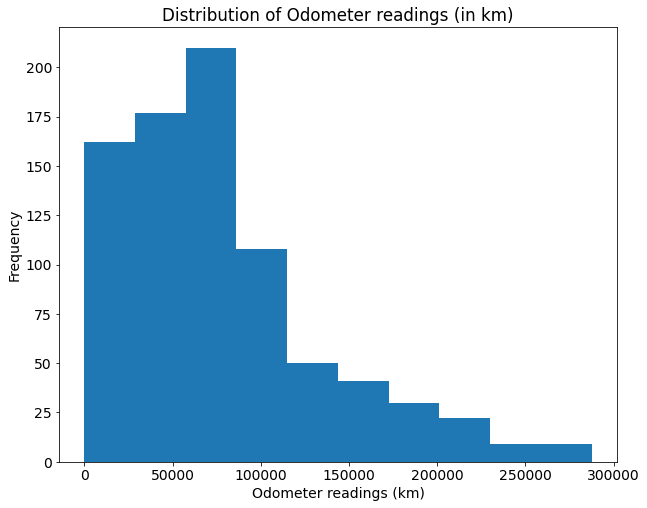

In [232]:
#fig, ax = plt.subplots(1,2)

#ax[0].hist(carsales['Odometer'])
#ax[1].boxplot(carsales['Odometer'])
#plt.show()





plt.hist(carsales['Odometer'])
plt.title("Distribution of Odometer readings (in km)")
plt.xlabel("Odometer readings (km)")
plt.ylabel("Frequency")
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x276c1927bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x276c1936190>,
 'boxes': [<matplotlib.lines.Line2D at 0x276c1927a00>],
 'medians': [<matplotlib.lines.Line2D at 0x276c1936730>],
 'fliers': [<matplotlib.lines.Line2D at 0x276c1936a00>],
 'means': []}

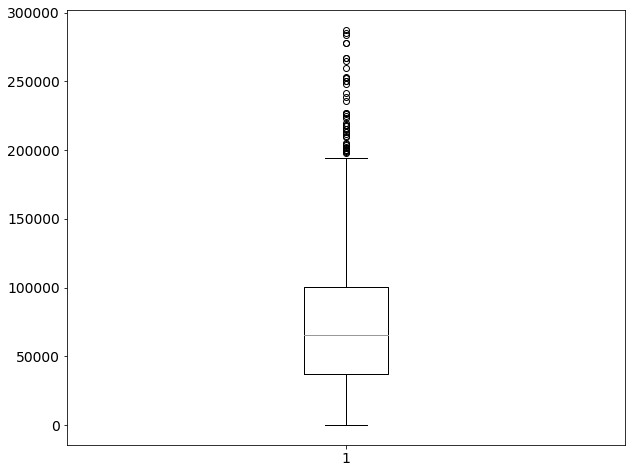

In [233]:
plt.boxplot(carsales['Odometer'])

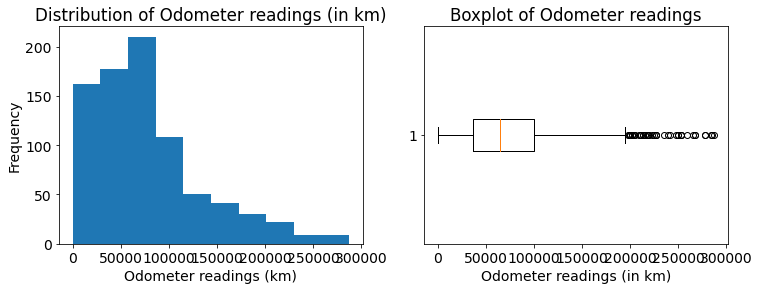

In [234]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].hist(carsales['Odometer'])
ax[0].set_title("Distribution of Odometer readings (in km)")
ax[0].set_xlabel("Odometer readings (km)")
ax[0].set_ylabel("Frequency")

ax[1].boxplot(carsales['Odometer'], vert = 0)
ax[1].set_title("Boxplot of Odometer readings")
ax[1].set_xlabel("Odometer readings (in km)")
plt.show()

In [235]:
Odometer_IQR = carsales['Odometer'].quantile(0.75) - carsales['Odometer'].quantile(0.25)
print(Odometer_IQR)

Upper_bound = carsales['Odometer'].quantile(0.75) + 1.5*(Odometer_IQR)
print(Upper_bound)

len(carsales[carsales['Odometer'] > Upper_bound])

63292.5
195012.5


45

c:\Users\USER\anaconda3\envs\snowy1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No of cars manufactured')

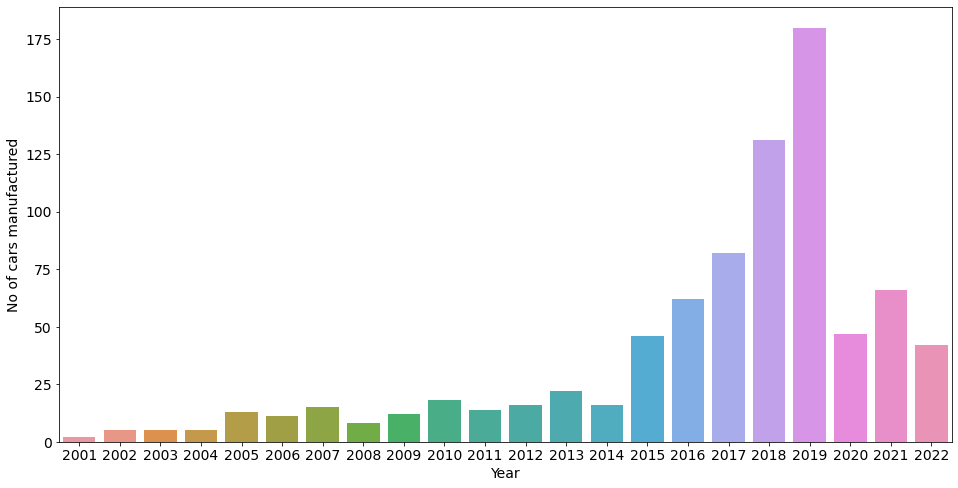

In [236]:
#fig, ax2 = plt.subplots(1,2, figsize=(20,4))
plt.figure(figsize=(16,8))
sns.countplot(carsales['Year'])
plt.ylabel("No of cars manufactured")
#ax2[0].set_title("Distribution of Odometer readings (in km)")
#ax2[0].set_xlabel("Odometer readings (km)")
#ax2[0].set_ylabel("Frequency")

#ax2[1].boxplot(carsales['Odometer'], vert = 0)
#ax2[1].set_title("Boxplot of Odometer readings")
#ax2[1].set_xlabel("Odometer readings (in km)")
#plt.show()

Text(0.5, 11.119999999999976, 'Asking price (in AUD)')

<Figure size 720x360 with 0 Axes>

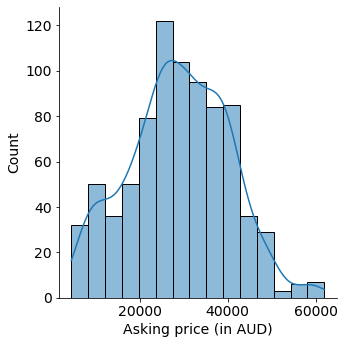

In [237]:
plt.figure(figsize=(10,5))
sns.displot(carsales['AskPrice'], kde=True, bins=15)
plt.xlabel("Asking price (in AUD)")

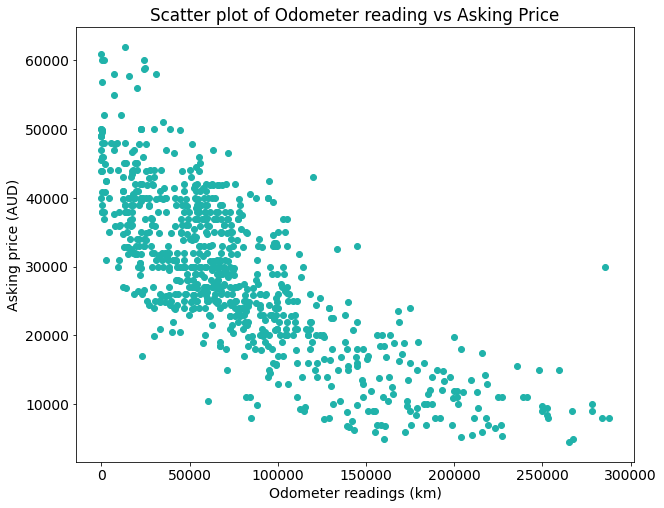

In [238]:
plt.scatter(carsales["Odometer"], carsales["AskPrice"], c = "lightseagreen")
plt.xlabel("Odometer readings (km)")
plt.ylabel("Asking price (AUD)")
plt.title("Scatter plot of Odometer reading vs Asking Price")
plt.show()

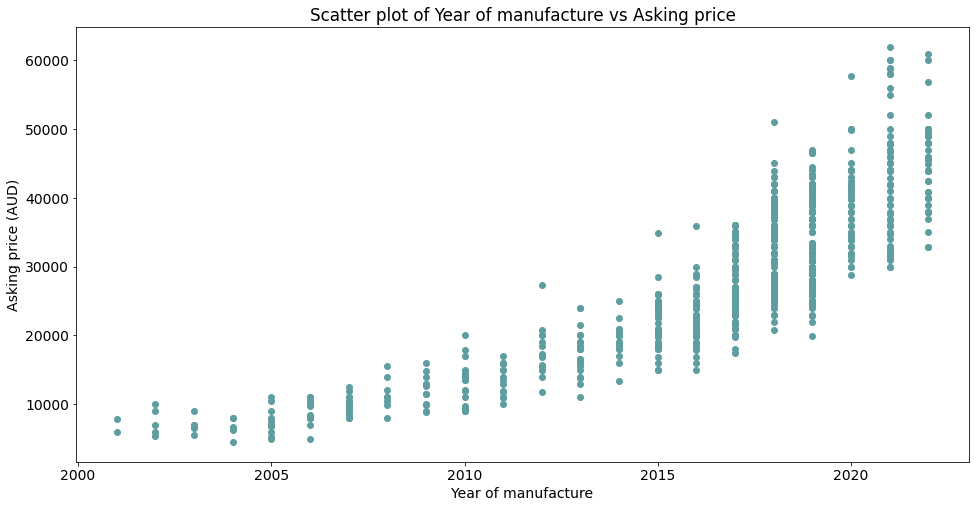

In [211]:
plt.scatter(carsales["Year"], carsales["AskPrice"], c = "cadetblue")
plt.xlabel("Year of manufacture")
plt.ylabel("Asking price (AUD)")
plt.title("Scatter plot of Year of manufacture vs Asking price")
plt.show()

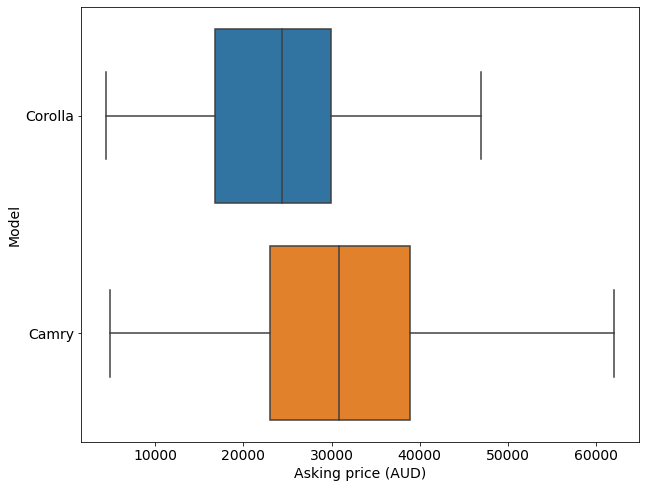

In [239]:

#plt.boxplot([carsales[carsales["Model"] == "Camry"]["AskPrice"], 
#             carsales[carsales["Model"] == "Corolla"]["AskPrice"]],
#             vert = 0)
#plt.yticks(labels=["Camry","Corolla"])
#plt.show()

sns.boxplot(x = carsales["AskPrice"], y = carsales["Model"])
plt.xlabel("Asking price (AUD)")
plt.show()

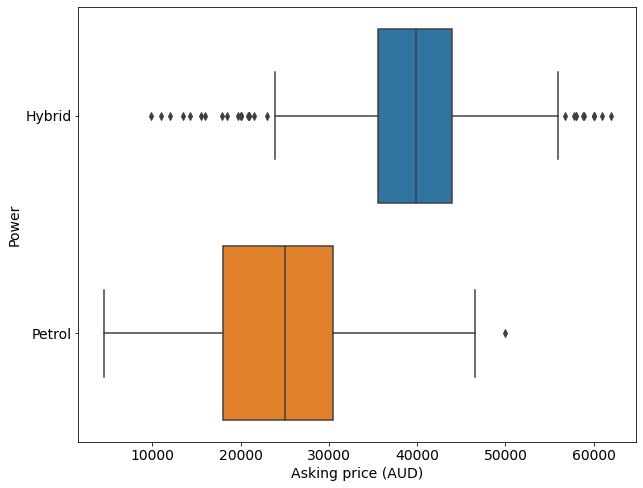

In [240]:
sns.boxplot(x = carsales["AskPrice"], y = carsales["Power"])
plt.xlabel("Asking price (AUD)")
plt.show()

In [241]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one dataframe
    :param results: <statsmodels RegressionResultsWrapper>
    :return df: <[pandas DataFrame]
    """
    coef = results.params
    std_err = results.bse


    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [242]:
def print_resstd_rsq(results):
    """
    Function to combine residual standard error and adjusted R-squared coefficient in one dataframe
    :param results: <statsmodels RegressionResultsWrapper>
    :return df: <[pandas DataFrame]
    """
    residual_std = np.sqrt(results.mse_resid)
    adj_r_squared = results.rsquared_adj


    df = pd.DataFrame(data = [[residual_std, adj_r_squared]],
                      columns=["Residual Standard Error","Adjusted R-squared"])
    return df

In [243]:
model = smf.ols('AskPrice ~ Year + C(Model) + Odometer + C(Power)', data=carsales)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AskPrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1483.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:08:48   Log-Likelihood:                -7934.8
No. Observations:                 818   AIC:                         1.588e+04
Df Residuals:                     813   BIC:                         1.590e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.625e+06   1.02e+05    -25.620      0.000   -2.83e+06   -2.42e+06
C(Model)[T.Corolla] -3894.8187    341.273    -11.413      0.000   -4564.698   -3224.940
C(Power)[T.Petrol]  -8061.9824    320.905    -25.123      0.000   -8691.882   -7432.083
Year                 1321.1145     50.671     26.072      0.000    1221.653    1420.576
Odometer               -0.0556      0.004    -14.704      0.000      -0.063      -0.048
==============================================================================
Omnibus:                      140.112   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.770
Skew:                           0.981   Prob(JB):                     3.96e-62
Kurtosis:                       5.109   Cond. No.                     7.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
print_coef_std_err(results)

,coef,std err
Intercept,-2.624594e+06,102442.078677
C(Model)[T.Corolla],-3.894819e+03,341.272503
C(Power)[T.Petrol],-8.061982e+03,320.904683
Year,1.321115e+03,50.671271
Odometer,-5.557949e-02,0.003780


In [245]:
print_resstd_rsq(results)

,Residual Standard Error,Adjusted R-squared
0,3961.333196,0.878892


In [246]:
np.std(results.resid, ddof = 5)

3961.3331961496947

In [247]:
# base code from https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

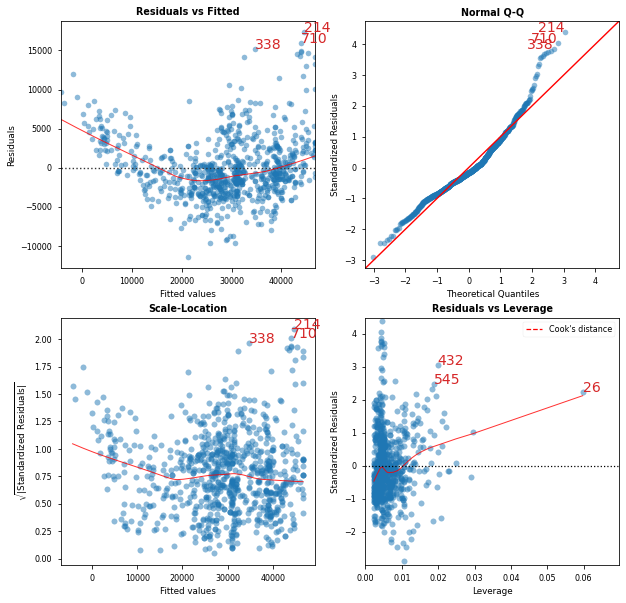

              Features  VIF Factor
1  C(Model)[T.Corolla]        1.04
2   C(Power)[T.Petrol]        1.17
4             Odometer        2.47
3                 Year        2.51
0            Intercept   547050.38


In [248]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

<AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

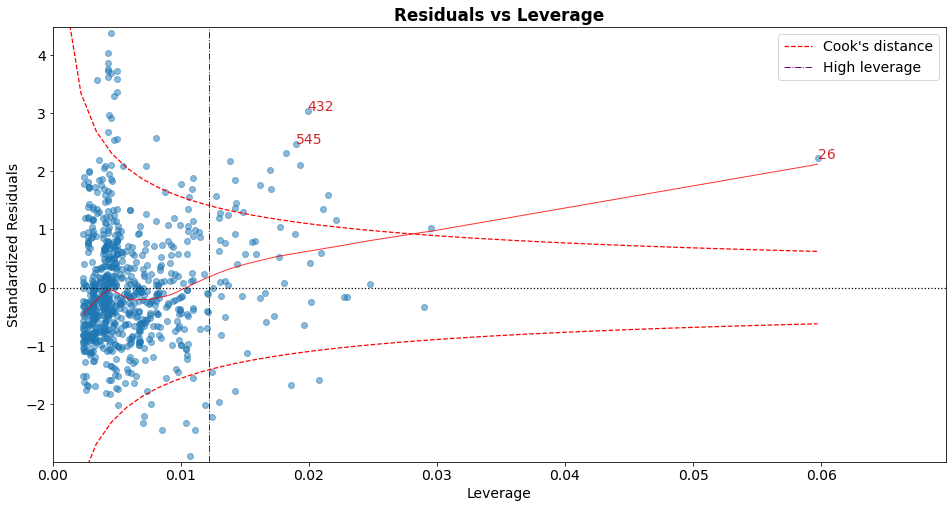

In [222]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof')

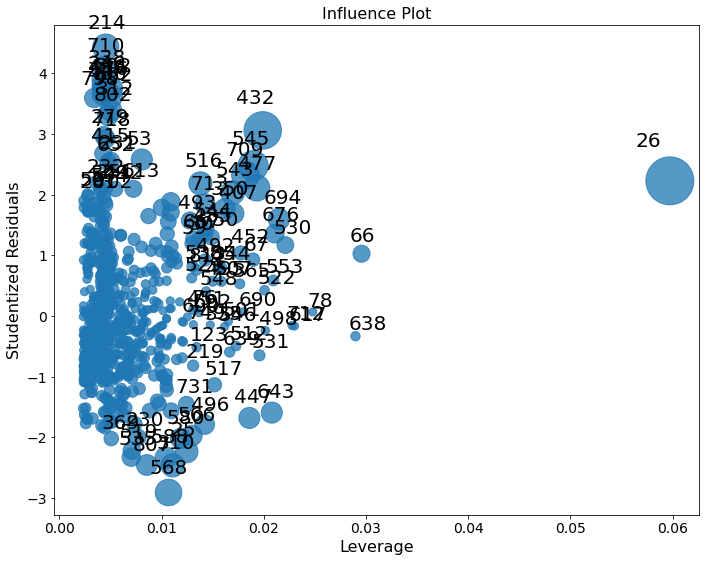

In [249]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

In [262]:
plt.rc("figure", figsize=(18, 10))
plt.rc("font", size=14)

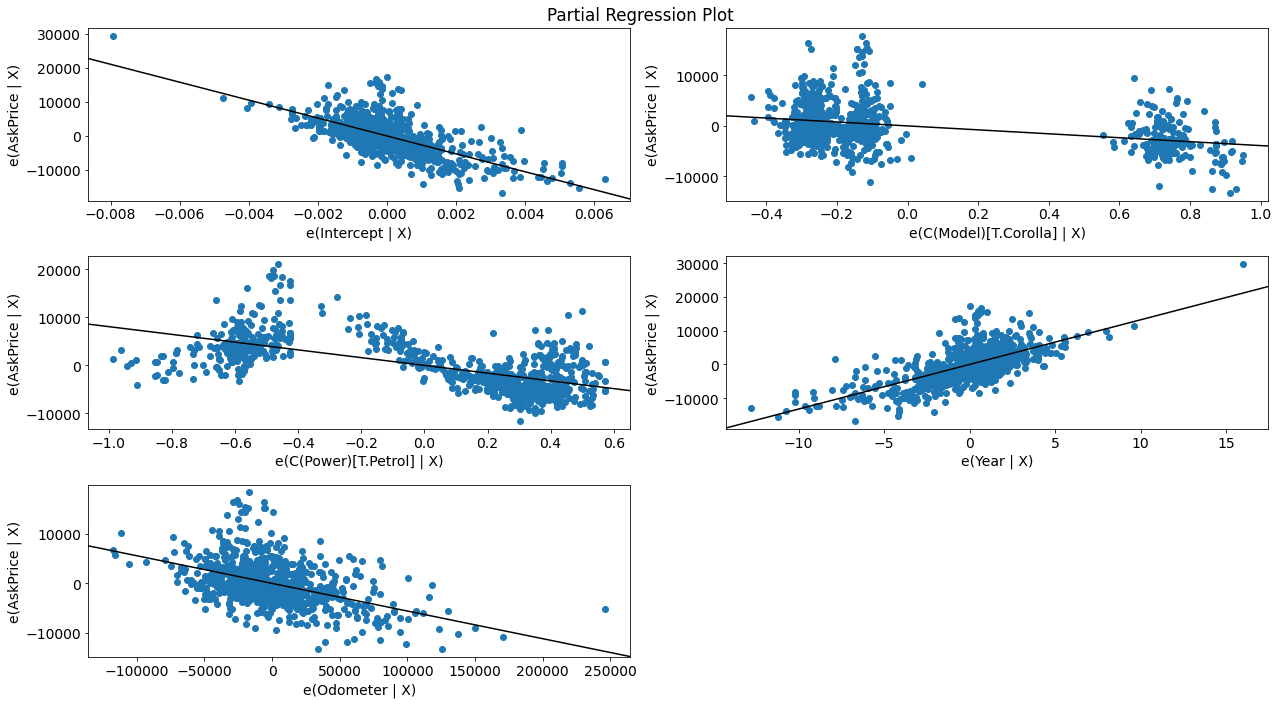

In [263]:
fig2 = sm.graphics.plot_partregress_grid(results)

#fig2.tight_layout(pad=1.0)

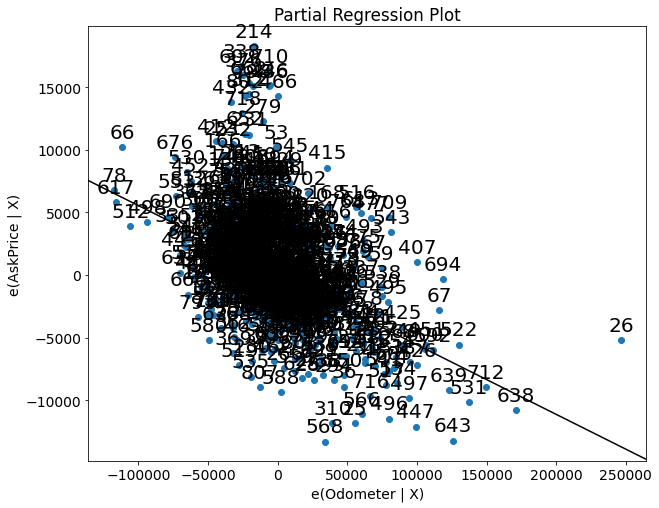

In [256]:
fig2 = sm.graphics.plot_partregress("AskPrice", "Odometer",["Year", "Model", "Power"], data=carsales)

In [280]:
boxcox(carsales["AskPrice"],alpha=0.05)


(array([13858.06301224, 14513.32229303,  9609.42636374, 16091.751052  ,
         9257.0127773 , 18606.70697685, 15200.2148369 ,  9800.38307892,
         7800.03790055, 14203.72392238, 10880.78544535, 16258.7764672 ,
        14168.51020787, 14551.53926819, 10699.21250343,  9983.73945014,
        15883.63180567, 14513.32229303, 12779.49505988, 16563.75562823,
        14547.75250485,  8899.4449248 ,  9609.42636374, 14168.51020787,
        16598.35677734,  8534.77024086, 11766.052131  ,  7391.89261708,
        14513.32229303, 12817.91286161,  3179.87643122,  7023.80454983,
        11409.33904144, 15577.19541285,  8459.79735997, 16937.15727789,
         7023.80454983,  5162.73760736, 12078.67387499,  8166.49692265,
        13858.06301224, 14513.32229303, 15904.76421233, 11762.52633608,
        12039.64638631,  7618.8619312 , 12117.33577524, 10305.67674679,
        11762.52633608, 14857.21516949, 14551.8835139 , 17109.65144529,
        14168.51020787, 15918.39634672,  9983.73945014, 14857.21

In [282]:
transformed_data, lmax_mle = boxcox(carsales["AskPrice"])



In [287]:
model2 = smf.ols('np.log(AskPrice) ~ Year + C(Model) + Odometer + C(Power)', data=carsales)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(AskPrice)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     3057.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:24:34   Log-Likelihood:                 561.22
No. Observations:                 818   AIC:                            -1112.
Df Residuals:                     813   BIC:                            -1089.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -140.2491      3.161    -44.375      0.000    -146.453    -134.045
C(Model)[T.Corolla]    -0.1457      0.011    -13.839      0.000      -0.166      -0.125
C(Power)[T.Petrol]     -0.2039      0.010    -20.592      0.000      -0.223      -0.184
Year                    0.0748      0.002     47.818      0.000       0.072       0.078
Odometer             -2.04e-06   1.17e-07    -17.494      0.000   -2.27e-06   -1.81e-06
==============================================================================
Omnibus:                       30.485   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.406
Skew:                           0.184   Prob(JB):                     3.80e-15
Kurtosis:                       4.346   Cond. No.                     7.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
print_coef_std_err(results2)


,coef,std err
Intercept,-140.249115,3.160570e+00
C(Model)[T.Corolla],-0.145708,1.052903e-02
C(Power)[T.Petrol],-0.203873,9.900635e-03
Year,0.074754,1.563323e-03
Odometer,-0.000002,1.166166e-07


In [291]:
print_resstd_rsq(results2)

,Residual Standard Error,Adjusted R-squared
0,0.122216,0.937349


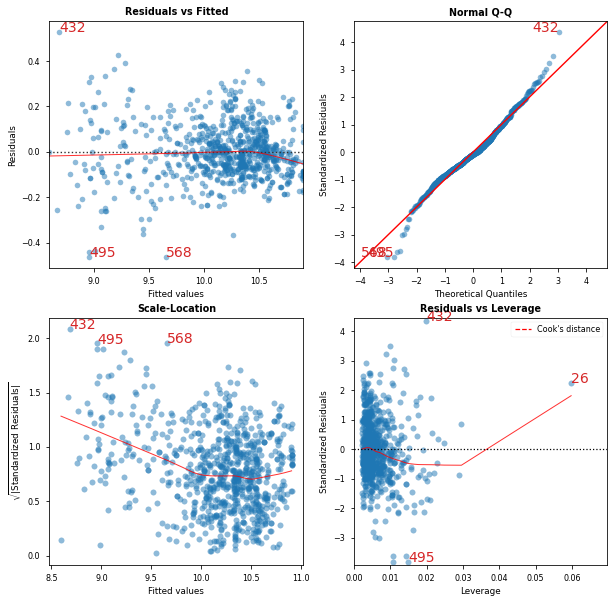

In [292]:
cls = LinearRegDiagnostic(results2)
vif, fig, ax = cls()

In [302]:
test_data = pd.read_csv('test_data.csv')
test_data

,Year,Model,AskPrice,Odometer,Transmission,Power
0,2014,Corolla,?,138279,Automatic,Petrol
1,2019,Corolla,?,68000,Automatic,Petrol
2,2019,Camry,?,49912,Automatic,Petrol
3,2020,Corolla,?,9687,Automatic,Hybrid
4,2017,Camry,?,68300,Automatic,Petrol
5,2018,Camry,?,58919,Automatic,Petrol
6,2021,Camry,?,51329,Automatic,Hybrid
7,2022,Camry,?,57260,Automatic,Hybrid


In [303]:
test_data = test_data[["Year","Model","Odometer","Power"]]
test_data

,Year,Model,Odometer,Power
0,2014,Corolla,138279,Petrol
1,2019,Corolla,68000,Petrol
2,2019,Camry,49912,Petrol
3,2020,Corolla,9687,Hybrid
4,2017,Camry,68300,Petrol
5,2018,Camry,58919,Petrol
6,2021,Camry,51329,Hybrid
7,2022,Camry,57260,Hybrid


In [309]:
predictions = np.exp(results2.predict(test_data))
predictions

0    15908.263019
1    26681.955556
2    32027.573431
3    39709.086306
4    26564.476595
5    29179.532725
6    45471.623410
7    48411.771859
dtype: float64